# Data Science Project - Basketball Players Analysis

## Background and Motivation

- One of the popular sports in the U.S. is basketball. One of the most important days in any sport is game day. Prathusha did an internship with the basketball team and this idea fascinated the others. Because of the interest in basketball and the importance of game day, we are trying to predict the performance on game day based on various factors taken into consideration for our home team.
- There are variety of factors taken into consideration for the analysis and prediction. For example, players’ performance leading up to game day, injuries, and the influence of a player on the overall team performance


## Project Objectives

- Prediction of the performance of individual players as game day arrives is based on various deciding factors like injury, player involvement, and other measures of performance for each practice. Game day is quite stressful, but also an important day to perform well. Without adding more pressure on the team to perform well on game day, our analytics will help the home team to win the match based on their performance on each day.
- We will use the factors injury, duration of each player’s practice, and the performance of each of the players as game day approaches, to do supervised and unsupervised analysis. Various factors will be used in these analyses to get maximum achieved performance on game day.
- Implementing strategic analysis methods will increase the probability of the team winning games in the future as well as reduce injuries.


##  Input data

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords

import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [178]:
analysis_data = pd.read_csv("CS Project Player Data.csv")

In [3]:
game_data = pd.read_csv("CS Project Game Logs.csv")
#Set the first row as the label of columns
game_data.columns = game_data.iloc[0]
game_data.drop(game_data.index[0])

,Date,H/A/N,Opponent,W/L,UTAH_POINTS,OPPONENT_POINTS,UTAH_FG,UTAH_FGA,UTAH_FG%,UTAH_3P,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
1,11/12/2016,H,Northwest Nazarene,W,81,37,26,57,0.456,6,...,14,21,0.667,7,32,2,5,2,12,28
2,11/15/2016,H,Concordia (OR),W,96,53,38,71,0.535,8,...,4,6,0.667,9,32,12,2,4,13,12
3,11/18/2016,H,Coppin State,W,94,51,30,62,0.484,12,...,16,26,0.615,6,29,5,6,2,15,22
4,11/25/2016,H,UC-Riverside,W,85,67,35,69,0.507,6,...,7,10,0.7,12,30,10,9,2,9,16
5,11/28/2016,H,Butler,L,59,68,19,52,0.365,3,...,7,15,0.467,4,23,12,12,0,13,20
6,12/1/2016,H,Montana State,W,92,84,32,66,0.485,5,...,20,27,0.741,8,24,14,7,4,10,25
7,12/6/2016,H,Utah Valley,W,87,80,31,61,0.508,10,...,9,13,0.692,7,31,19,5,4,12,20
8,12/10/2016,A,Xavier,L,69,77,28,54,0.519,5,...,15,21,0.714,13,33,13,3,3,8,17
9,12/17/2016,H,Prairie View,W,92,60,32,54,0.593,7,...,10,18,0.556,7,22,8,9,4,6,26
10,12/22/2016,N,San Francisco,L,86,89,29,55,0.527,7,...,11,16,0.688,6,28,16,9,0,22,26


In [4]:
analysis_data

,PlayerID,date,InjuryStatus,InjuryType,ActivityType,rpe,dur,minply,trimp,Location,Opponent,Date_Act_Loc_Opp,TPR
0,MBB01,10/01/16,0.0,0.0,1.0,3.000000,180.0,NaN,540.000000,NaN,NaN,Oct 01_Practice,NaN
1,MBB05,10/01/16,0.0,0.0,1.0,4.000000,180.0,NaN,720.000000,NaN,NaN,Oct 01_Practice,NaN
2,MBB07,10/01/16,0.0,0.0,0.0,0.000000,0.0,NaN,0.000000,NaN,NaN,Oct 01_Practice,NaN
3,MBB09,10/01/16,0.0,0.0,1.0,3.000000,180.0,NaN,540.000000,NaN,NaN,Oct 01_Practice,NaN
4,MBB11,10/01/16,0.0,0.0,1.0,3.000000,180.0,NaN,540.000000,NaN,NaN,Oct 01_Practice,NaN
5,MBB12,10/01/16,0.0,0.0,1.0,5.000000,180.0,NaN,900.000000,NaN,NaN,Oct 01_Practice,NaN
6,MBB13,10/01/16,0.0,0.0,1.0,3.000000,180.0,NaN,540.000000,NaN,NaN,Oct 01_Practice,NaN
7,MBB14,10/01/16,0.0,0.0,1.0,4.000000,180.0,NaN,720.000000,NaN,NaN,Oct 01_Practice,NaN
8,MBB17,10/01/16,0.0,0.0,1.0,4.000000,180.0,NaN,720.000000,NaN,NaN,Oct 01_Practice,NaN
9,MBB18,10/01/16,0.0,0.0,1.0,2.000000,180.0,NaN,360.000000,NaN,NaN,Oct 01_Practice,NaN


## Data Visualization

### Data Exploration Of Practices VS Game VS Off Days

In [120]:
#Group the data by date and Activity Type, find the size of each ActivityType in each day
date_activity = analysis_data.groupby(['date','ActivityType']).size()
#make a datframe for grouped data
activity_frame = pd.DataFrame(date_activity.reset_index())
activity_frame.columns = ['date','ActivityType','sum']
#Convert date into date format and sort it
activity_frame['date'] = pd.to_datetime(activity_frame.date)
activity_frame.sort_values(['date']).reset_index(drop= True)

,date,ActivityType,sum
0,2016-10-01,0.0,1
1,2016-10-01,1.0,14
2,2016-10-02,0.0,15
3,2016-10-03,1.0,16
4,2016-10-04,1.0,16
5,2016-10-05,0.0,16
6,2016-10-06,1.0,16
7,2016-10-07,1.0,16
8,2016-10-08,1.0,16
9,2016-10-09,0.0,16


In [127]:
#Due to the large number of data, we group the date by month.
activity_frame['year'] = [y.year for y in activity_frame['date']]
activity_frame['month'] = [m.month for m in activity_frame['date']]

In [157]:
#Group off days data by year and month
off = activity_frame.loc[activity_frame['ActivityType'] == 0.0]
off.sort_values(['date']).reset_index(drop=True)
off = off.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
off = pd.DataFrame(off)

#Group practice days data by year and month
practice = activity_frame.loc[activity_frame['ActivityType'] == 1.0]
practice.sort_values(['date']).reset_index(drop=True)
practice = practice.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
practice = pd.DataFrame(practice)

#Group game days data by year and month
game = activity_frame.loc[activity_frame['ActivityType'] == 2.0]
game.sort_values(['date']).reset_index(drop=True)
game = game.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
game = pd.DataFrame(game)

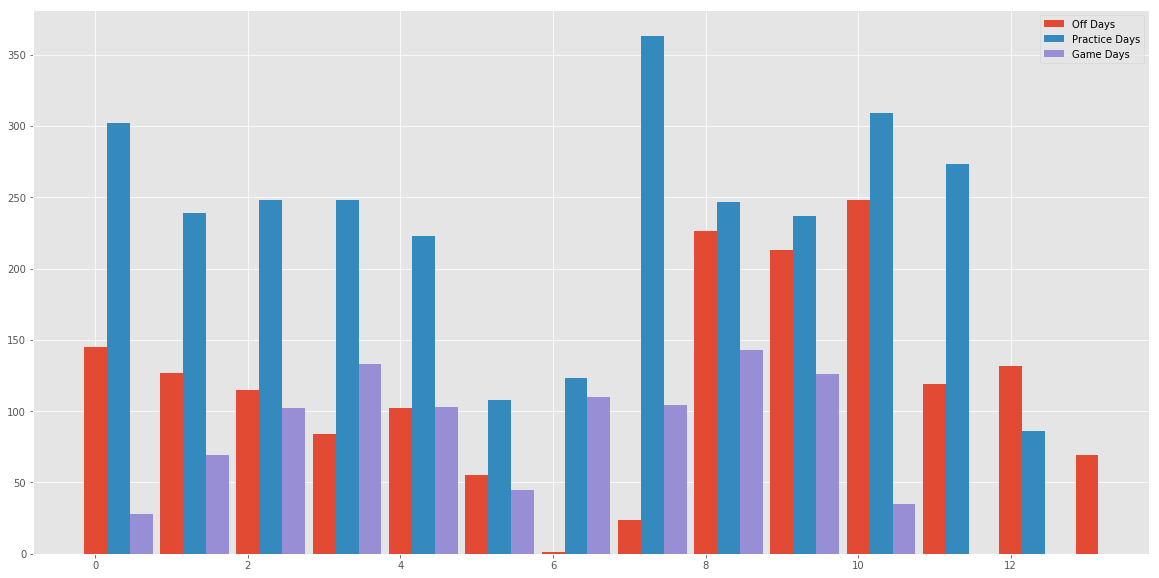

In [177]:
#Make bar plot for each type of activity
plt.figure(figsize=(20,10))
plt.bar(off.index, off['sum'], width = 0.3,label='Off Days')
plt.bar(practice.index + 0.3, practice['sum'],  width = 0.3,label='Practice Days')
plt.bar(game.index + 0.6, game['sum'],  width = 0.3,label='Game Days')
plt.legend()